# Análise Exploratória - Dataset de Proteínas

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carregando o dataframe

df = pd.read_csv('proteinas_20000_enriquecido.csv', encoding='utf-8')

### 1. Visualização Geral do Dataset

In [4]:
# print de algumas linhas para ter noção de como é o dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(df.head(10))

  ID_Proteína                                          Sequência  Massa_Molecular  Ponto_Isoelétrico  Hidrofobicidade  Carga_Total  Proporção_Polar  Proporção_Apolar  Comprimento_Sequência      Classe
0      P00001  YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...       24667.4032           5.655161         0.105263            4         0.210526          0.349282                    209   Receptora
1      P00002  CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...       21284.0710           5.892805         0.150838            3         0.189944          0.418994                    179  Estrutural
2      P00003  QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...       17255.9747           7.228237         0.171141            9         0.181208          0.422819                    149      Enzima
3      P00004  HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...       11792.1909           8.434802         0.173469            7         0.275510          0.408163                     98  Transp

In [5]:
# quantidade de linhas e colunas

df.shape

(60000, 10)

In [6]:
# listando colunas

df.columns

Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência', 'Classe'], dtype='object')

In [7]:
# tipo de cada atributo

df.dtypes

ID_Proteína               object
Sequência                 object
Massa_Molecular          float64
Ponto_Isoelétrico        float64
Hidrofobicidade          float64
Carga_Total                int64
Proporção_Polar          float64
Proporção_Apolar         float64
Comprimento_Sequência      int64
Classe                    object
dtype: object

In [8]:
# algumas infos sobre cada atributo numérico

df.describe()

,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,20798.002743,7.259727,0.149968,8.727517,0.199930,0.400025,174.775683
std,8611.766490,1.447584,0.027094,7.503895,0.033709,0.041577,72.330865
min,5407.315100,4.050028,0.000000,-18.000000,0.018182,0.173077,50.000000
25%,13353.876800,6.051557,0.133136,3.000000,0.178571,0.373984,112.000000
50%,20784.058050,7.155000,0.150000,8.000000,0.199301,0.400000,175.000000
75%,28221.612275,8.585916,0.166667,13.000000,0.220859,0.425743,237.000000
max,37097.077600,11.785610,0.289474,52.000000,0.400000,0.640000,300.000000


### 2. Listando possíveis valores de Classe

In [9]:
print("\nValores possíveis na coluna 'classe':")

lista_classes = df['Classe'].unique()
print(lista_classes)


Valores possíveis na coluna 'classe':
['Receptora' 'Estrutural' 'Enzima' 'Transporte' 'Outras']


### 3. Checagem de nulos e valores "incorretos"

In [10]:
# quantos nulos em cada coluna

df.isna().sum()

ID_Proteína              0
Sequência                0
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
Classe                   0
dtype: int64

In [11]:
# checa se os valores de IDs de proteína estão exatamente de 1 a 60000, que é a quantidade de linhas
# caso não seja, checa se há duplicatas

# ignorando essa célula por que estava muito pesada

"""
ids_sequenciais = True
for i in range(1, 60001):
    i_str = f"P{i:05d}"
    
    quant = df['ID_Proteína'].value_counts()[i_str]

    if quant < 1:
        print(f"Proteína {i} não encontrada")
        ids_sequenciais = False
    elif quant > 1:
        print(f"Existe mais de uma ocorrência da proteína {i}")
        ids_sequenciais = False

if (ids_sequenciais == False) and df['ID_Proteína'].duplicated().any():

    valores_duplicados = df['id'][df['id'].duplicated()].unique()
    
    print("Os seguintes ID_Proteína aparecem mais de uma vez:")
    print(valores_duplicados)

else:
    print("Não possui ids duplicados")
"""

'\nids_sequenciais = True\nfor i in range(1, 60001):\n    i_str = f"P{i:05d}"\n\n    quant = df[\'ID_Proteína\'].value_counts()[i_str]\n\n    if quant < 1:\n        print(f"Proteína {i} não encontrada")\n        ids_sequenciais = False\n    elif quant > 1:\n        print(f"Existe mais de uma ocorrência da proteína {i}")\n        ids_sequenciais = False\n\nif (ids_sequenciais == False) and df[\'ID_Proteína\'].duplicated().any():\n\n    valores_duplicados = df[\'id\'][df[\'id\'].duplicated()].unique()\n\n    print("Os seguintes ID_Proteína aparecem mais de uma vez:")\n    print(valores_duplicados)\n\nelse:\n    print("Não possui ids duplicados")\n'

In [12]:
# ids devem ser únicos

print(df['ID_Proteína'].nunique())

60000


### 4. Comparações Entre Classes

In [13]:
df.groupby('Classe').describe()

Massa_Molecular                                                                                           Ponto_Isoelétrico                                                                        Hidrofobicidade                                                                       Carga_Total                                                 Proporção_Polar                                                                       Proporção_Apolar                                                                  Comprimento_Sequência                                                         
                     count          mean          std        min          25%          50%           75%         max             count      mean       std       min       25%       50%       75%        max           count      mean       std       min       25%       50%       75%       max       count      mean       std   min  25%  50%   75%   max           count      mean       std       min       25%       50%       75%       max            count      mean       std       min       25%  50%       75%       max                 count        mean        std   min    25%    50%    75%    max
Classe                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Enzima             11954.0  20858.182339  8645.072196  5407.3151  13368.07740  20922.39870  28269.889725  37066.7300           11954.0  7.257546  1.450770  4.050028  6.053248  7.151448  8.585819  11.630242         11954.0  0.149869  0.026807  0.016667  0.133475  0.150000  0.166667  0.289474     11954.0  8.709553  7.453964 -18.0  3.0  8.0  13.0  44.0         11954.0  0.200349  0.033638  0.060606  0.178862  0.200000  0.221395  0.366667          11954.0  0.399768  0.041207  0.205479  0.373842  0.4  0.425800  0.614035               11954.0  175.311946  72.625541  50.0  112.0  176.0  238.0  300.0
Estrutural         11991.0  20719.469953  8594.028428  5634.3646  13265.83940  20701.59110  28092.579900  36913.5579           11991.0  7.261581  1.446981  4.050028  6.050676  7.169125  8.570669  11.670405         11991.0  0.150322  0.027222  0.015873  0.133197  0.150538  0.167241  0.271930     11991.0  8.670169  7.441025 -16.0  3.0  8.0  13.0  41.0         11991.0  0.199333  0.033606  0.036364  0.177966  0.199095  0.220779  0.362319          11991.0  0.400732  0.041771  0.196078  0.374477  0.4  0.425926  0.640000               11991.0  174.092820  72.177145  50.0  111.0  174.0  237.0  300.0
Outras             12216.0  20785.990127  8543.605422  5510.0721  13432.34020  20800.92985  28154.291625  36909.8286           12216.0  7.248166  1.451651  4.050028  6.040572  7.131043  8.586464  11.735003         12216.0  0.149966  0.026821  0.000000  0.133333  0.150000  0.166667  0.274194     12216.0  8.723232  7.587466 -16.0  3.0  8.0  14.0  41.0         12216.0  0.199678  0.033538  0.018182  0.178571  0.198830  0.220472  0.400000          12216.0  0.400149  0.041101  0.173077  0.374194  0.4  0.425837  0.612903               12216.0  174.654879  71.750988  50.0  113.0  175.0  236.0  300.0
Receptora          11850.0  20821.137854  8679.829382  5578.1495  13314.14575  20804.49615  28359.153600  36872.5199           11850.0  7.280530  1.435785  4.050028  6.079905  7.187541  8.589800  11.785610         11850.0  0.150048  0.027080  0.013158  0.132979  0.150344  0.167329  0.274510     11850.0  8.857722  7.507524 -16.0  4.0  8.0  13.0  41.0         11850.0  0.200061  0.034167  0.035088  0.178378  0.199313

In [15]:
# utilizando apenas as colunas numéricas

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(colunas_numericas)

['Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência']


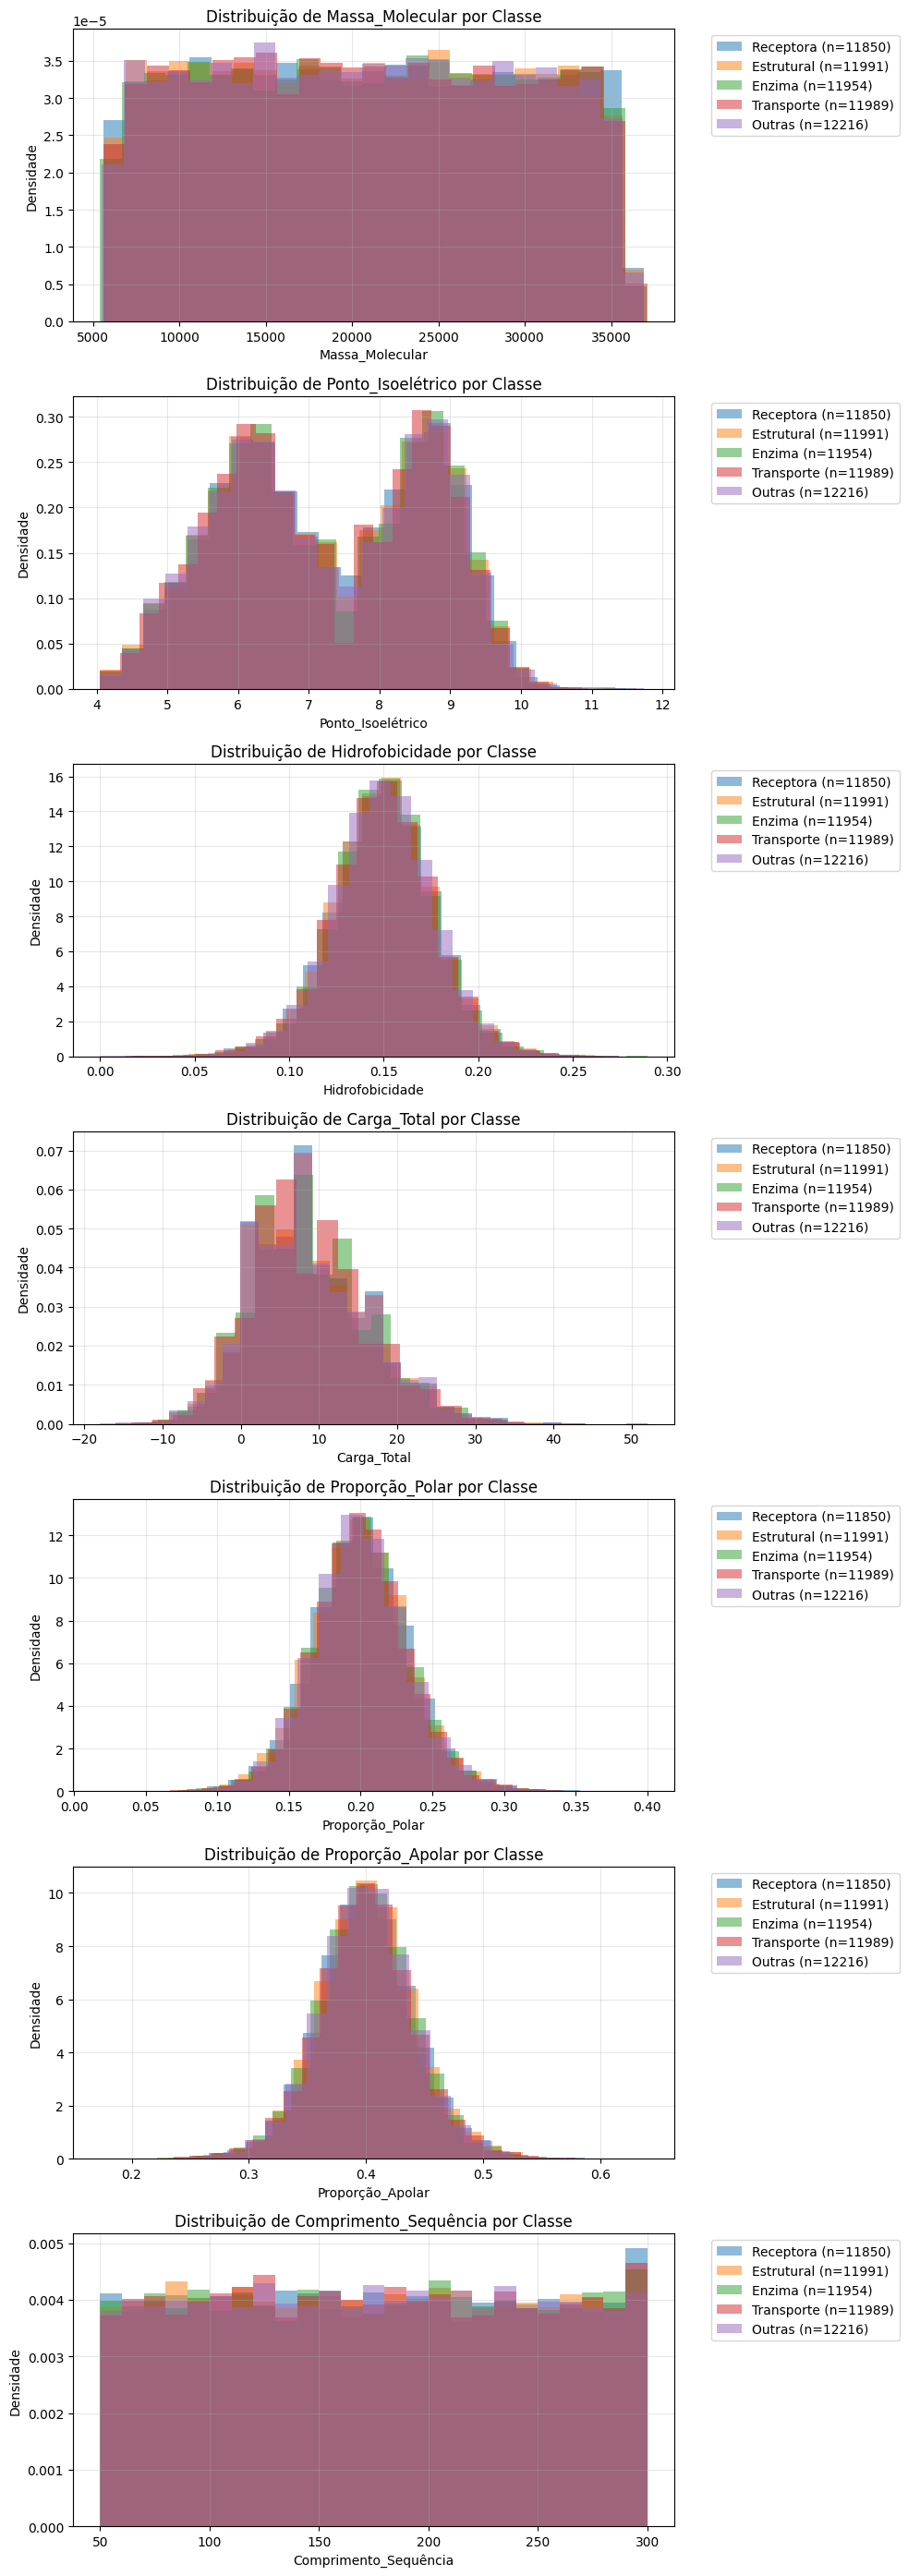

In [17]:
fig, axes = plt.subplots(len(colunas_numericas), 1, 
                        figsize=(10, 4*len(colunas_numericas)))

if len(colunas_numericas) == 1:
    axes = [axes]

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, coluna in enumerate(colunas_numericas):
    ax = axes[i]
    
    for j, classe in enumerate(lista_classes):
        dados_classe = df[df['Classe'] == classe][coluna]
        ax.hist(dados_classe, bins=25, alpha=0.5, 
                label=f'{classe} (n={len(dados_classe)})', 
                color=cores[j], density=True)
    
    ax.set_xlabel(coluna)
    ax.set_ylabel('Densidade')
    ax.set_title(f'Distribuição de {coluna} por Classe')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5. Detecção de Outliers

In [18]:
# função para detectar outliers usando o método IQR (Intervalo Interquartil)

def detectar_outliers_iqr(dados):
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return dados[(dados < limite_inferior) | (dados > limite_superior)]


ANÁLISE DA CLASSE: Receptora
Total de exemplos: 11850

--- DETECÇÃO DE OUTLIERS ---
Coluna Massa_Molecular: 0 outliers (0.00%)
Coluna Ponto_Isoelétrico: 0 outliers (0.00%)
Coluna Hidrofobicidade: 204 outliers (1.72%)
Coluna Carga_Total: 244 outliers (2.06%)
Coluna Proporção_Polar: 237 outliers (2.00%)
Coluna Proporção_Apolar: 239 outliers (2.02%)
Coluna Comprimento_Sequência: 0 outliers (0.00%)

--- VISUALIZAÇÃO ---


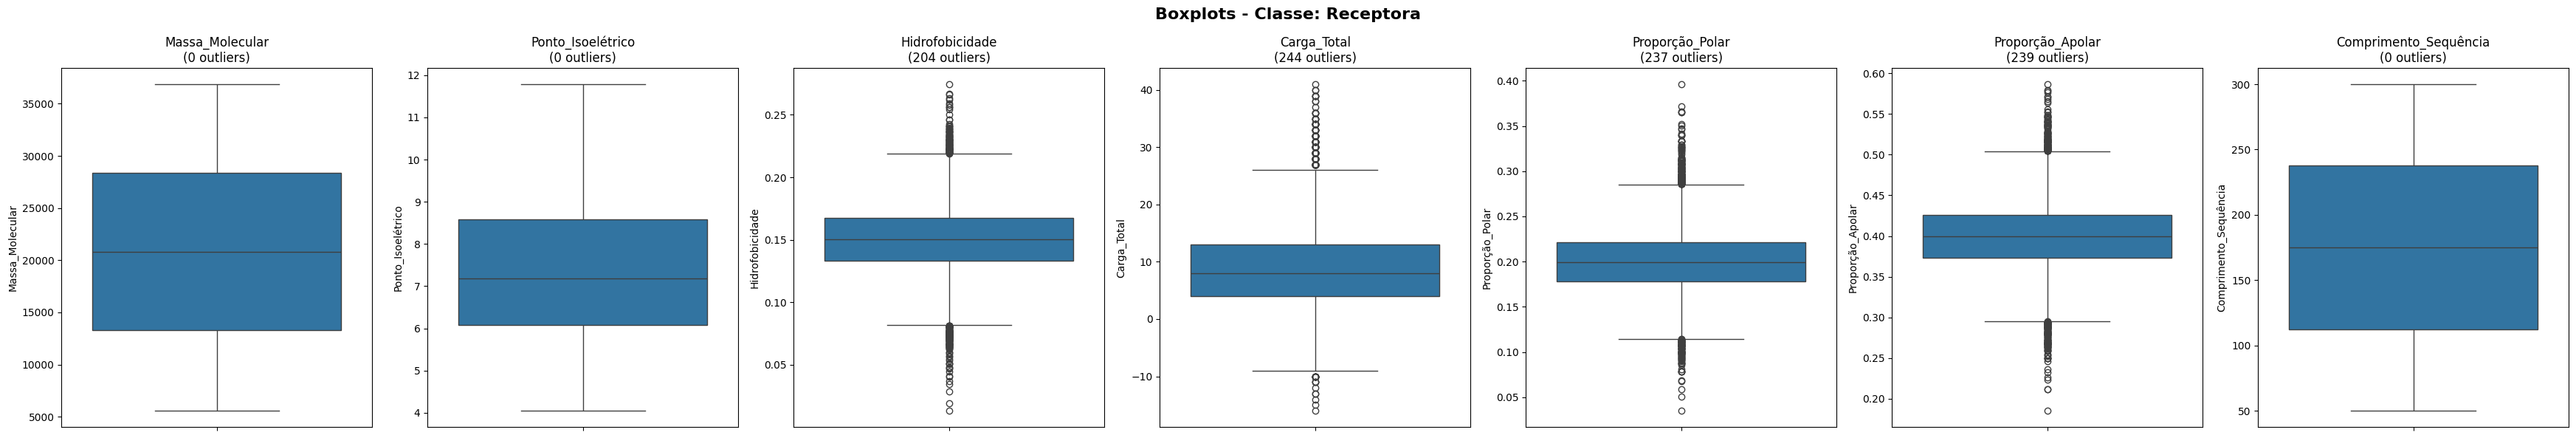


--- FIM DA ANÁLISE DE Receptora ---


ANÁLISE DA CLASSE: Estrutural
Total de exemplos: 11991

--- DETECÇÃO DE OUTLIERS ---
Coluna Massa_Molecular: 0 outliers (0.00%)
Coluna Ponto_Isoelétrico: 0 outliers (0.00%)
Coluna Hidrofobicidade: 242 outliers (2.02%)
Coluna Carga_Total: 113 outliers (0.94%)
Coluna Proporção_Polar: 186 outliers (1.55%)
Coluna Proporção_Apolar: 257 outliers (2.14%)
Coluna Comprimento_Sequência: 0 outliers (0.00%)

--- VISUALIZAÇÃO ---


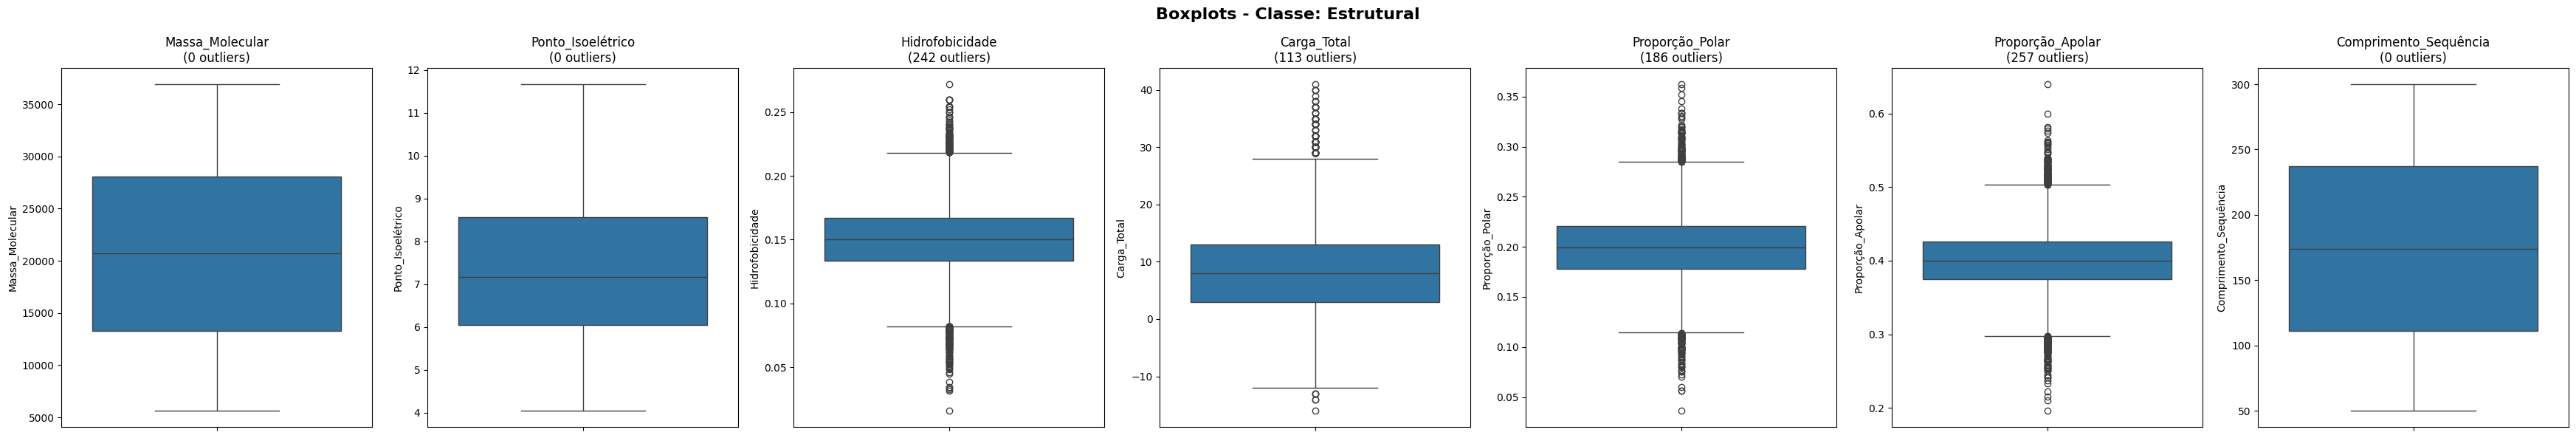


--- FIM DA ANÁLISE DE Estrutural ---


ANÁLISE DA CLASSE: Enzima
Total de exemplos: 11954

--- DETECÇÃO DE OUTLIERS ---
Coluna Massa_Molecular: 0 outliers (0.00%)
Coluna Ponto_Isoelétrico: 0 outliers (0.00%)
Coluna Hidrofobicidade: 258 outliers (2.16%)
Coluna Carga_Total: 127 outliers (1.06%)
Coluna Proporção_Polar: 221 outliers (1.85%)
Coluna Proporção_Apolar: 226 outliers (1.89%)
Coluna Comprimento_Sequência: 0 outliers (0.00%)

--- VISUALIZAÇÃO ---


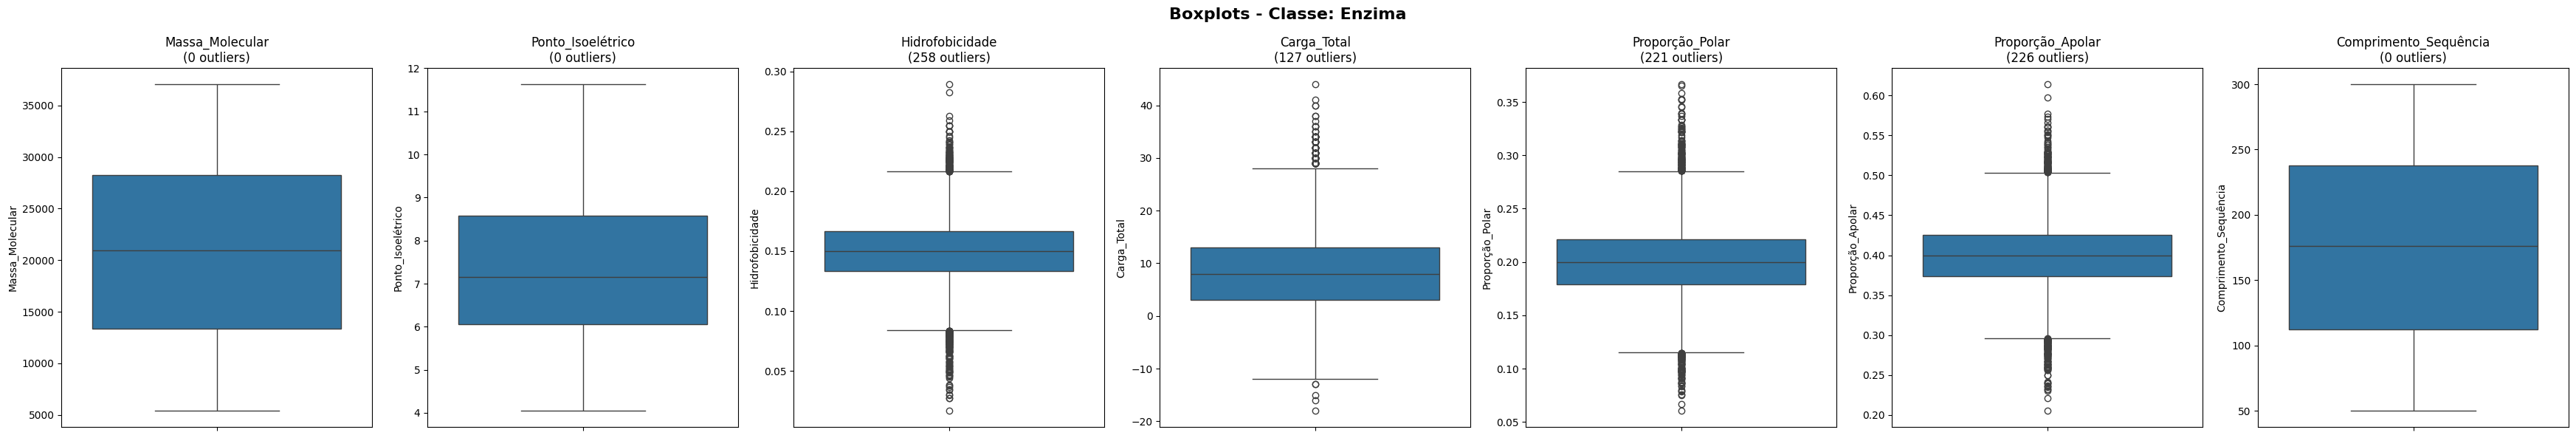


--- FIM DA ANÁLISE DE Enzima ---


ANÁLISE DA CLASSE: Transporte
Total de exemplos: 11989

--- DETECÇÃO DE OUTLIERS ---
Coluna Massa_Molecular: 0 outliers (0.00%)
Coluna Ponto_Isoelétrico: 0 outliers (0.00%)
Coluna Hidrofobicidade: 259 outliers (2.16%)
Coluna Carga_Total: 127 outliers (1.06%)
Coluna Proporção_Polar: 263 outliers (2.19%)
Coluna Proporção_Apolar: 276 outliers (2.30%)
Coluna Comprimento_Sequência: 0 outliers (0.00%)

--- VISUALIZAÇÃO ---


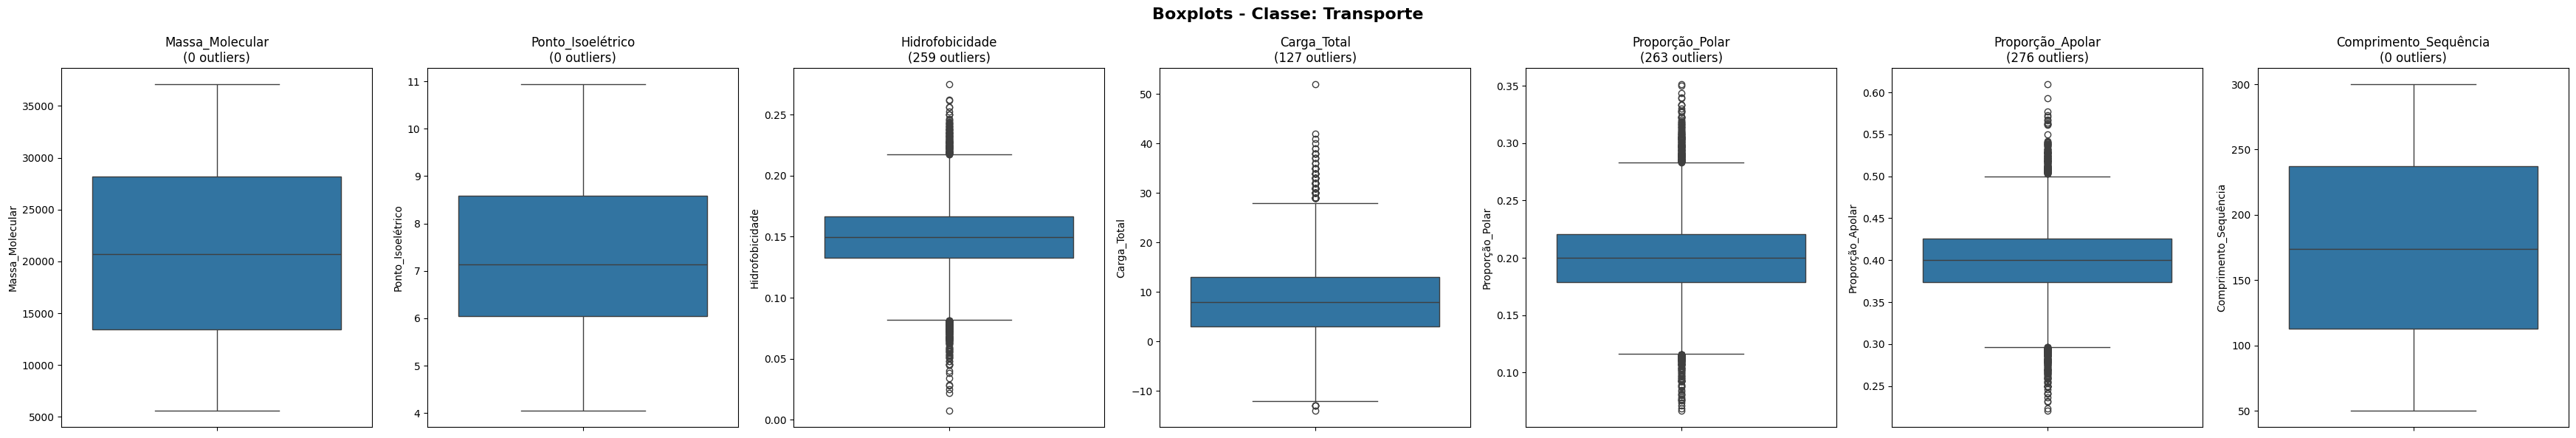


--- FIM DA ANÁLISE DE Transporte ---


ANÁLISE DA CLASSE: Outras
Total de exemplos: 12216

--- DETECÇÃO DE OUTLIERS ---
Coluna Massa_Molecular: 0 outliers (0.00%)
Coluna Ponto_Isoelétrico: 0 outliers (0.00%)
Coluna Hidrofobicidade: 255 outliers (2.09%)
Coluna Carga_Total: 82 outliers (0.67%)
Coluna Proporção_Polar: 236 outliers (1.93%)
Coluna Proporção_Apolar: 219 outliers (1.79%)
Coluna Comprimento_Sequência: 0 outliers (0.00%)

--- VISUALIZAÇÃO ---


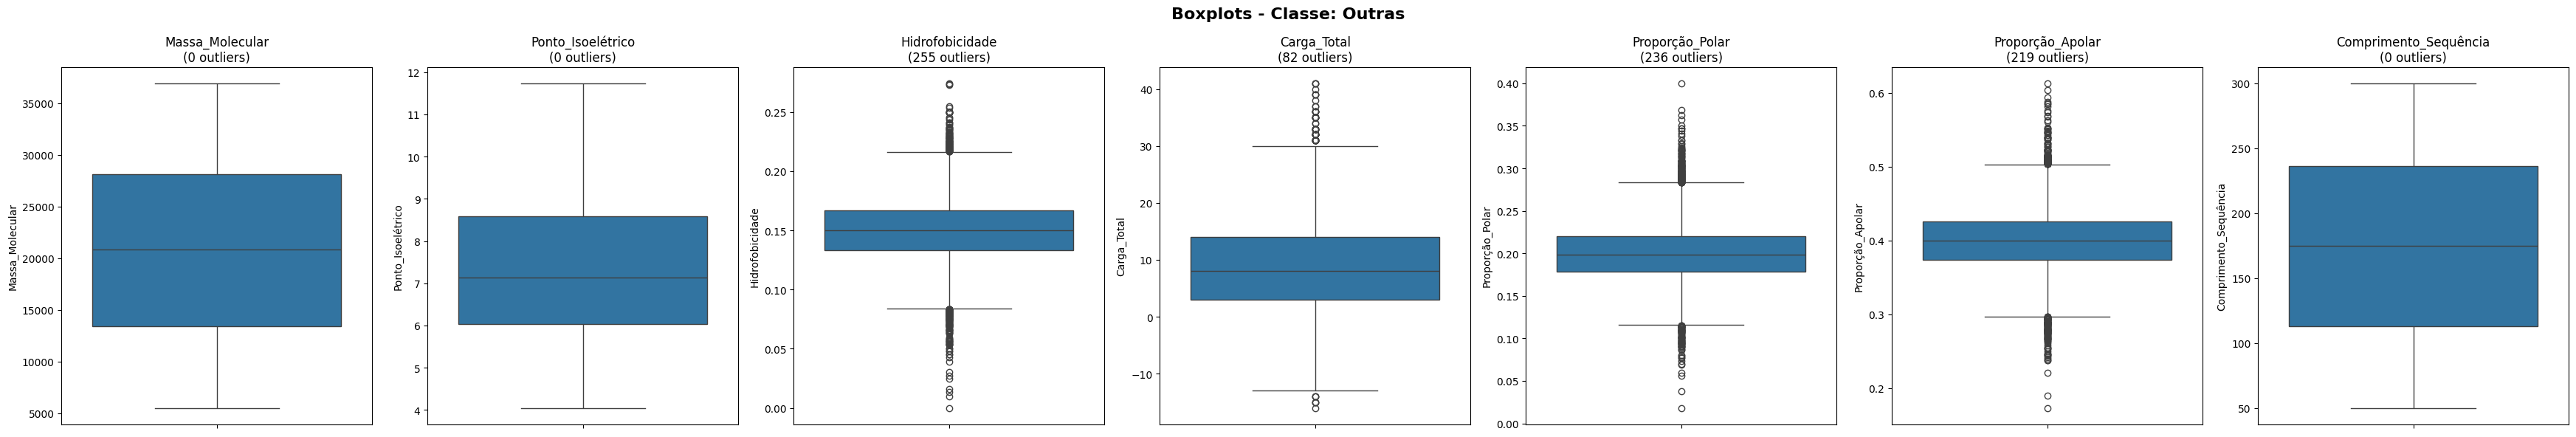


--- FIM DA ANÁLISE DE Outras ---



In [19]:
for classe in lista_classes:
    print(f"\n{'='*50}")
    print(f"ANÁLISE DA CLASSE: {classe}")
    print('='*50)
    
    # filtra dados da classe atual
    dados_classe = df[df['Classe'] == classe]
    print(f"Total de exemplos: {len(dados_classe)}")
    
    # 1. calcula outliers para cada coluna numérica
    print(f"\n--- DETECÇÃO DE OUTLIERS ---")
    for coluna in colunas_numericas:
        outliers = detectar_outliers_iqr(dados_classe[coluna])
        qtd_outliers = len(outliers)
        percentual = (qtd_outliers / len(dados_classe)) * 100 if len(dados_classe) > 0 else 0
        print(f"Coluna {coluna}: {qtd_outliers} outliers ({percentual:.2f}%)")
    
    # 2. plota boxplots para visualização
    print(f"\n--- VISUALIZAÇÃO ---")
    fig, axes = plt.subplots(1, len(colunas_numericas), 
                            figsize=(5*len(colunas_numericas), 6))
    
    
    fig.suptitle(f'Boxplots - Classe: {classe}', fontsize=16, fontweight='bold')
    
    for i, coluna in enumerate(colunas_numericas):
        sns.boxplot(y=dados_classe[coluna], ax=axes[i])
        axes[i].set_title(f'{coluna}')
        axes[i].set_ylabel(coluna)
        
        # Adicionar informação de outliers no título
        outliers = detectar_outliers_iqr(dados_classe[coluna])
        qtd_outliers = len(outliers)
        axes[i].set_title(f'{coluna}\n({qtd_outliers} outliers)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n--- FIM DA ANÁLISE DE {classe} ---\n")

### 6. Relação Entre Atributos

##### 6.1. Correlação Gerais

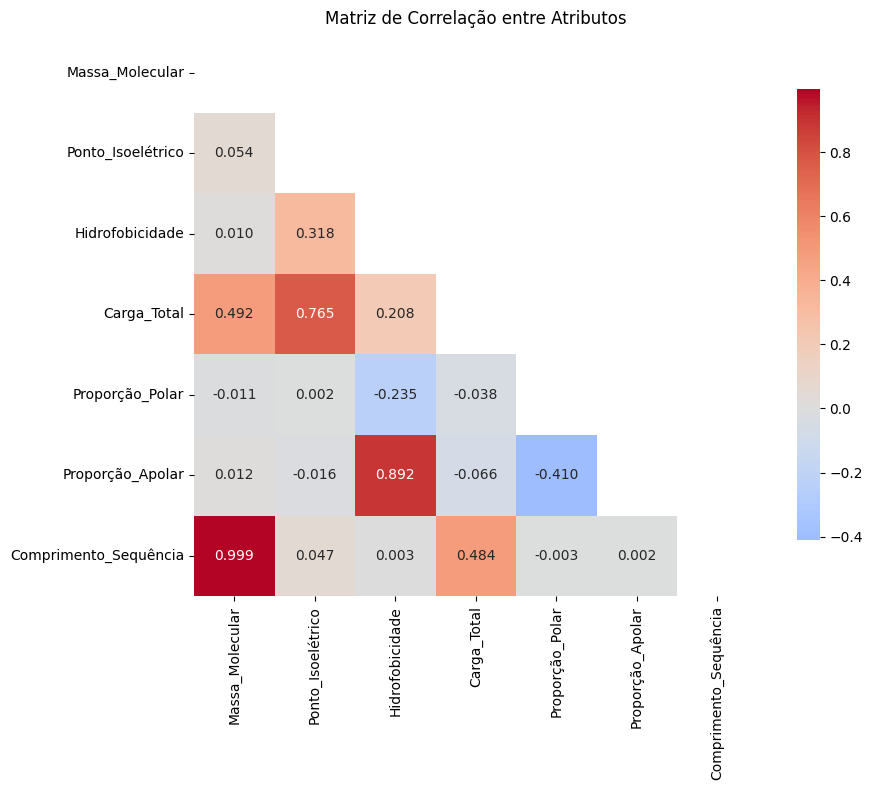

Correlações mais fortes (>0.7):
Massa_Molecular vs Comprimento_Sequência: 0.999
Ponto_Isoelétrico vs Carga_Total: 0.765
Hidrofobicidade vs Proporção_Apolar: 0.892


In [25]:
# calcula matriz de correlação
correlacao = df[colunas_numericas].corr()

# plotar heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))  # mascara triângulo superior
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8},
            mask=mask)
plt.title('Matriz de Correlação entre Atributos')
plt.tight_layout()
plt.show()

# mostrar correlações mais fortes
print("Correlações mais fortes (>0.7):")
for i in range(len(correlacao.columns)):
    for j in range(i+1, len(correlacao.columns)):
        corr_val = correlacao.iloc[i, j]
        if corr_val > 0.7:
            print(f"{correlacao.columns[i]} vs {correlacao.columns[j]}: {corr_val:.3f}")

##### 6.2. Correlação por Classe

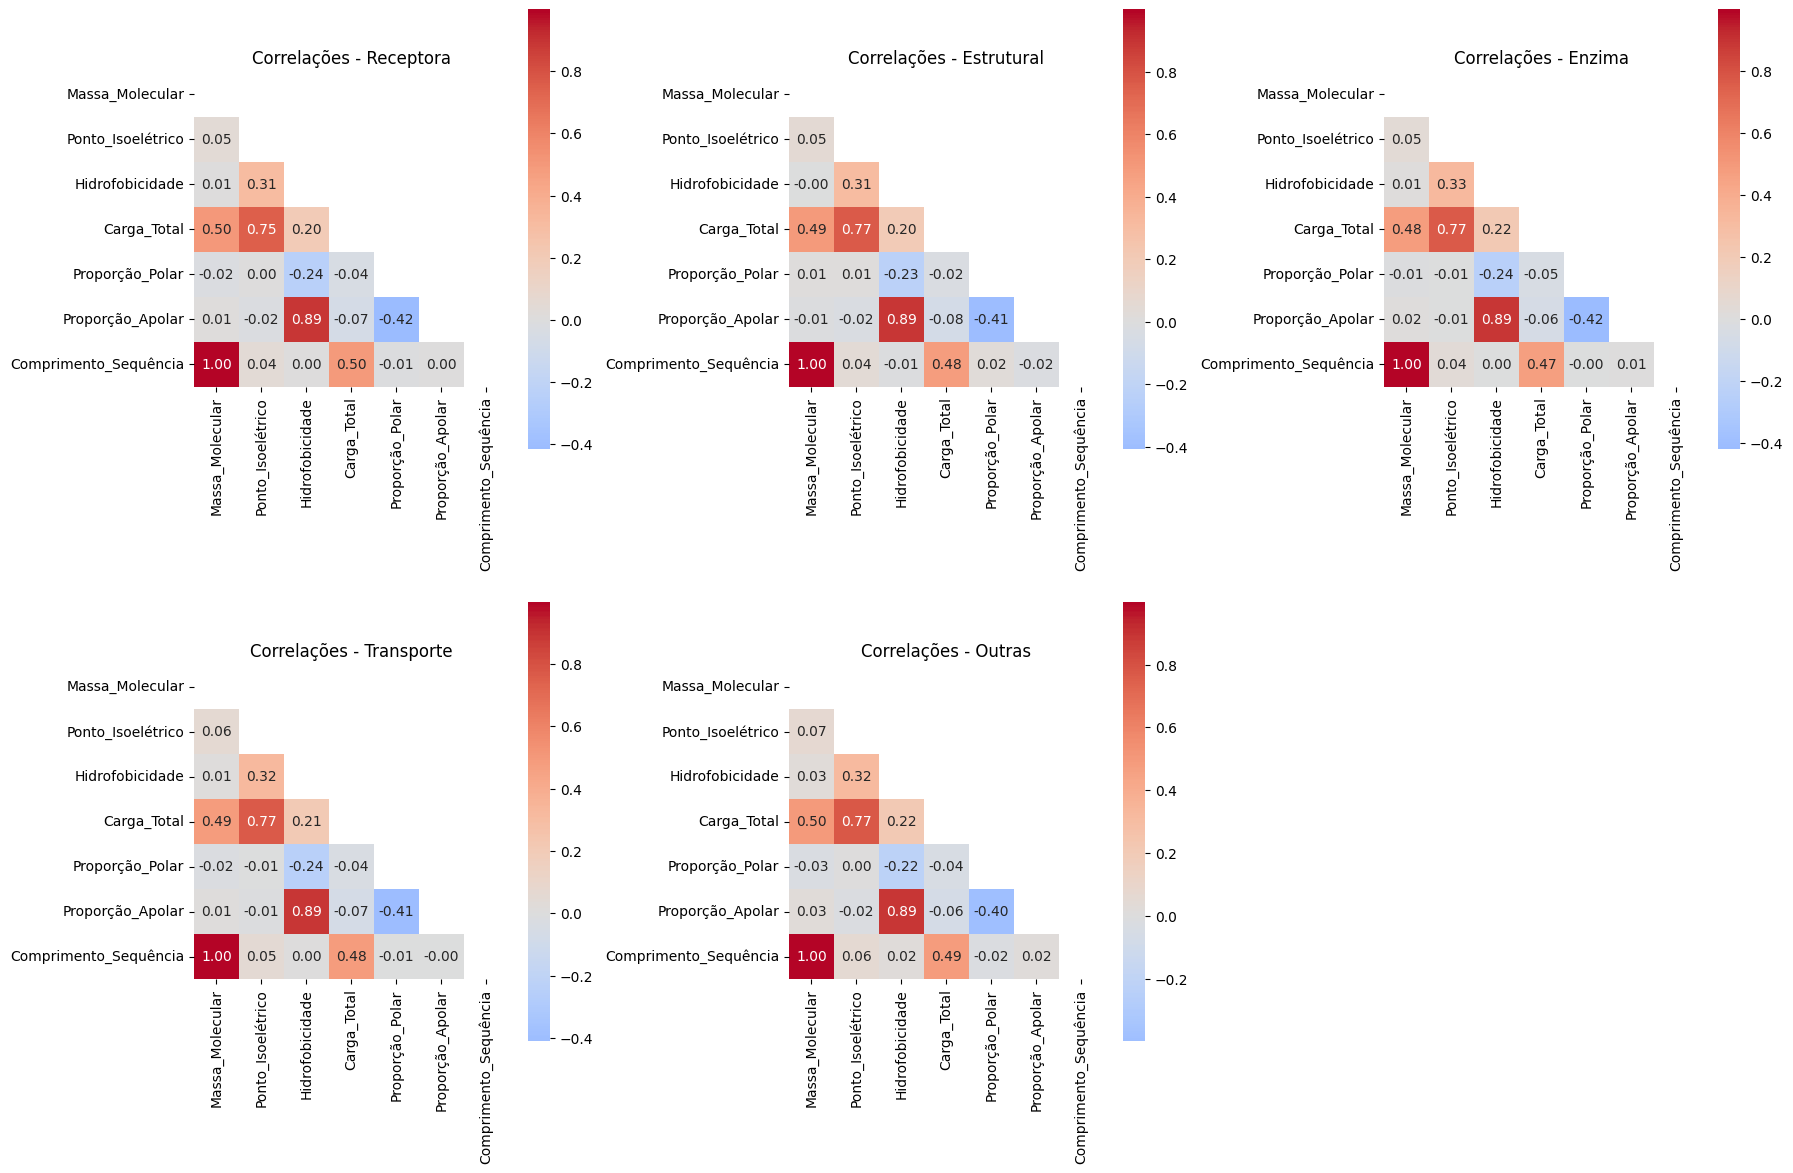

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, classe in enumerate(lista_classes):
    dados_classe = df[df['Classe'] == classe][colunas_numericas]
    correlacao_classe = dados_classe.corr()
    
    sns.heatmap(correlacao_classe, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', ax=axes[i], mask=mask)
    axes[i].set_title(f'Correlações - {classe}')

# remove subplot extra
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

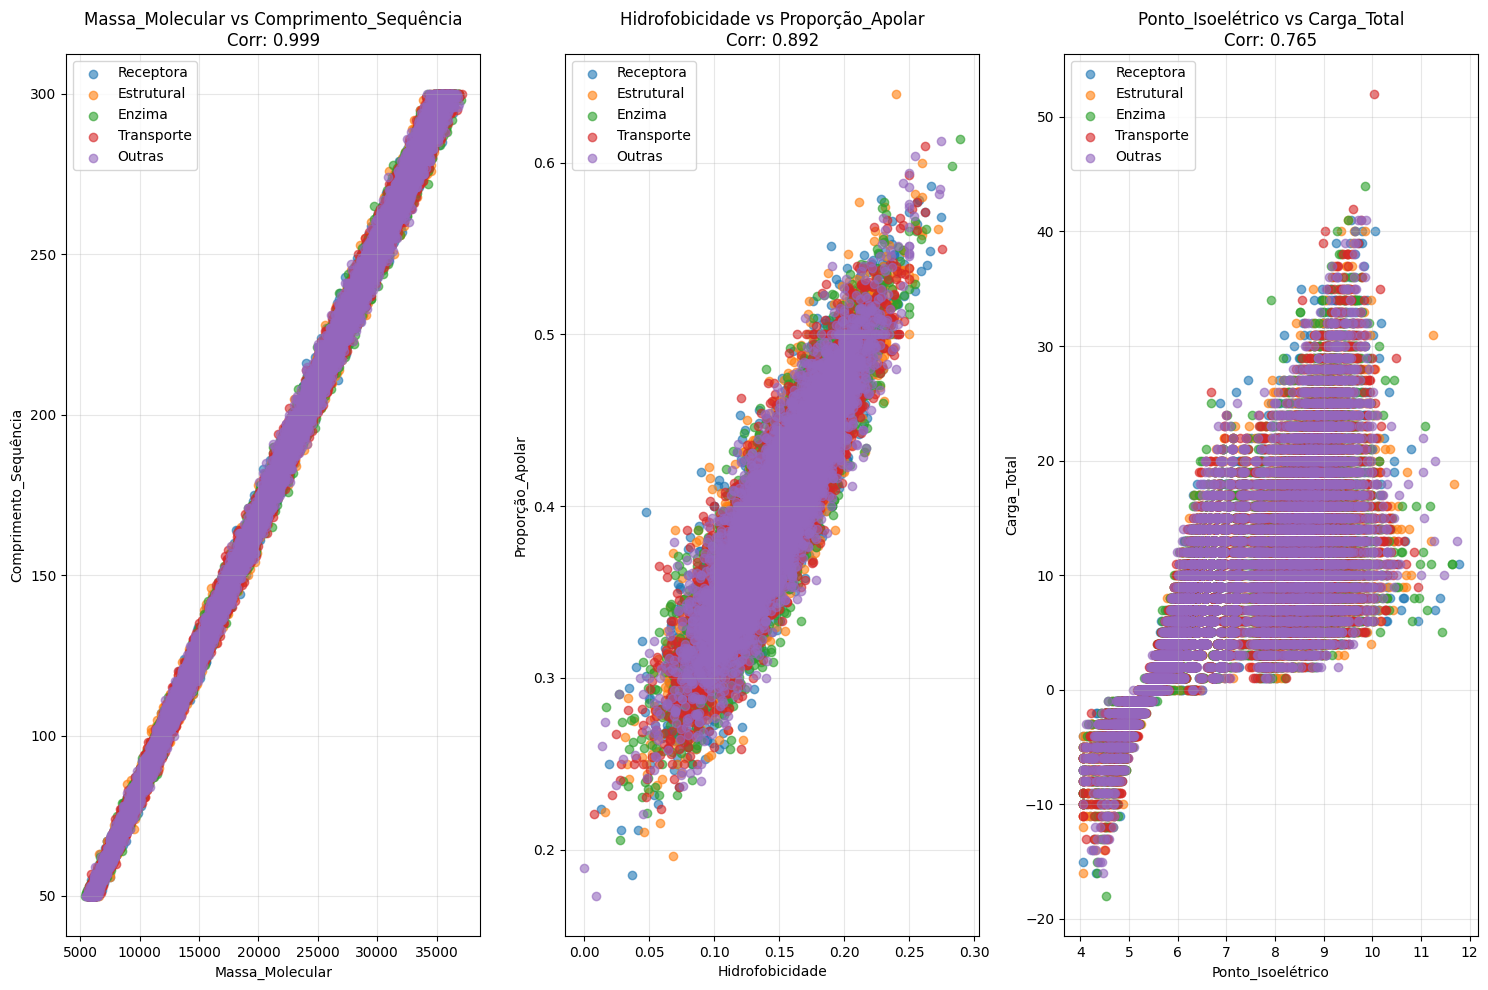

In [42]:
# scatter plots das correlações mais interessantes
if correlacoes_interessantes:
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i in range(3):
        corr = correlacoes_interessantes[i]
        ax = axes[i]
        
        # scatter plot com cores por classe
        for classe in lista_classes:
            dados_classe = df[df['Classe'] == classe]
            ax.scatter(dados_classe[corr['var1']], dados_classe[corr['var2']], 
                      label=classe, alpha=0.6)
        
        ax.set_xlabel(corr['var1'])
        ax.set_ylabel(corr['var2'])
        ax.set_title(f"{corr['var1']} vs {corr['var2']}\nCorr: {corr['correlacao']:.3f}")
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()